<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/skinRetouching/tests/face_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Smoothing Detection and Beautification


https://github.com/5starkarma/face-smoothing

1. Linking next cloud

In [2]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

input_folder, output_folder = create_io(database=nextcloud,topic='skinRetouching',library='FS')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2235  100  2235    0     0  12081      0 --:--:-- --:--:-- --:--:-- 12081
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
content of /etc/fstab: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/database davfs user,rw,auto 0 0


2. Clone Git repository

In [3]:
import os
root_path = '/content/FS'

# clone the repository
if not os.path.exists('FS'):
  !git clone https://github.com/luca-arts/face-smoothing/ {root_path} #forked repository with patches

Cloning into '/content/FS'...
remote: Enumerating objects: 661, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 661 (delta 119), reused 218 (delta 109), pack-reused 426
Receiving objects: 100% (661/661), 39.85 MiB | 43.23 MiB/s, done.
Resolving deltas: 100% (331/331), done.


4. configuration file

we read the yaml config file and set the wanted `conf_threshold` 

In [4]:
!pip install -U PyYAML
import yaml
from yaml.loader import SafeLoader
config_path =  root_path + '/configs/configs.yaml'

conf_threshold = 0.5

# Open the file and load the file
with open(config_path) as f:
    data = yaml.load(f, Loader=yaml.Loader)
    #update conf_threshold
    data['net']['conf_threshold'] = conf_threshold
    sorted_data = yaml.dump(data, sort_keys=True)
    #print(sorted_data)
#write the updated yml file back
with open(config_path, 'w') as f:
    yaml.dump(data, f)    

     |████████████████████████████████| 596 kB 2.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


5. execute script

In [5]:
%cd /content/FS
!python3 '/content/FS/infer.py' --input {input_folder} --output {output_folder} --config {config_path} --show-detections


/content/FS
next image:  LB_0001.jpg
Face detected: [308, 109, 381, 211]
saving image  /content/database/skinRetouching/input/LB_0001.jpg
/content/database/skinRetouching/FS/output_LB_0001.jpg
next image:  LB_0002.jpg
next image:  LB_0003.jpg
next image:  LB_0004.jpg
Face detected: [313, 147, 381, 251]
saving image  /content/database/skinRetouching/input/LB_0004.jpg
/content/database/skinRetouching/FS/output_LB_0004.jpg
next image:  LB_0005.jpg
Face detected: [319, 110, 394, 216]
saving image  /content/database/skinRetouching/input/LB_0005.jpg
/content/database/skinRetouching/FS/output_LB_0005.jpg
next image:  LB_0006.jpg
Face detected: [283, 109, 359, 214]
saving image  /content/database/skinRetouching/input/LB_0006.jpg
/content/database/skinRetouching/FS/output_LB_0006.jpg
next image:  LB_0007.jpg
next image:  LB_0008.jpg
Face detected: [246, 88, 319, 192]
saving image  /content/database/skinRetouching/input/LB_0008.jpg
/content/database/skinRetouching/FS/output_LB_0008.jpg
next imag

15


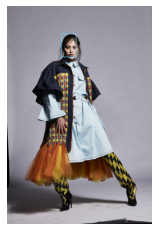

In [26]:
# recursive removal of directory
# do we need this command??
#! rm -r {output}

# inits
import glob
#from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Comparing the I/O folder
#import filecmp
#directory_cmp = filecmp.dircmp(input_folder, output_folder)
#print("=========== Comparison Report =========== \n")
#directory_cmp.report()

# making lists for I/O folder
iFS_files = glob.glob(input_folder + '/*.jpg')
iFS_files.sort()

oFS_files = glob.glob(output_folder + '/*.jpg')
oFS_files.sort()

# Visualising the I/O folder
def combined_display(input, output):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))
    
  # combine image, foreground, and alpha into one line
  combined = np.concatenate((image, foreground, matte * 255), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined

# visualize all images
print (len(oFS_files))

for i in range(len(oFS_files)):
  #iname = Image.open(os.path.join(input_folder, file))
  #oname = Image.open(os.path.join(output_folder, file))
  #display(combined_display(iname, oname))

  # needs some subplots for rows / columns
  # best practice would be visualising the input images from the input folder
  # next to the output images -> since both are in a list it's more diffivult to get
  # an image when it's not present. 
  # the lists are build upon [0, 1, ...] maybe creating the lists when into the face detection algo
  img = mpimg.imread(oFS_files[i])
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  
